In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan_data.csv',index_col=0)

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.shape

(381, 12)

In [6]:
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

Gender                0
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
from collections import Counter 

In [9]:
Counter(df['Self_Employed'])

Counter({'No': 325, 'Yes': 35, nan: 21})

In [10]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Gender                0
Married               0
Dependents            8
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
Counter(df['Loan_Amount_Term'])

Counter({360.0: 312,
         120.0: 3,
         240.0: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         180.0: 29,
         60.0: 1,
         300.0: 7,
         nan: 1,
         480.0: 11,
         nan: 1,
         nan: 1,
         84.0: 3,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         12.0: 1,
         36.0: 1})

In [14]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [15]:
Counter(df['Loan_Amount_Term'])

Counter({360.0: 323,
         120.0: 3,
         240.0: 2,
         180.0: 29,
         60.0: 1,
         300.0: 7,
         480.0: 11,
         84.0: 3,
         12.0: 1,
         36.0: 1})

In [16]:
df.isnull().sum()

Gender                0
Married               0
Dependents            8
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           8
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
Counter(df['Dependents'])

Counter({'1': 52, '0': 234, '2': 59, '3+': 28, nan: 8})

In [20]:
df['Dependents'].replace(['0','1','2','3+'],[0,1,2,3],inplace=True)

In [21]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [22]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
df['ApplicantIncome']=df['ApplicantIncome'].astype(float)

In [24]:
Counter(df['Property_Area'])

Counter({'Rural': 106, 'Urban': 126, 'Semiurban': 149})

In [25]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,381,2,Male,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,381,2,Yes,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,381.0,NaN,NaN,NaN,0.666667,0.987643,0.0,0.0,0.0,1.0,3.0
Education,381,2,Graduate,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,381,2,No,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,381.0,NaN,NaN,NaN,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,NaN,NaN,NaN,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,NaN,NaN,NaN,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,381.0,NaN,NaN,NaN,341.417323,67.625957,12.0,360.0,360.0,360.0,480.0
Credit_History,381.0,NaN,NaN,NaN,0.850394,0.357154,0.0,1.0,1.0,1.0,1.0


In [27]:
df=pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Property_Area'],drop_first=True)

In [28]:
X=df.drop('Loan_Status',axis=1)

In [29]:
y=df['Loan_Status']

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
y=le.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scale=ss.fit_transform(X_train)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc= RandomForestClassifier(n_estimators=100,max_depth=4)

In [38]:
rfc.fit(X_train_scale,y_train)

RandomForestClassifier(max_depth=4)

In [39]:
rfc.score(X_train_scale,y_train)

0.8666666666666667

In [40]:
X_test_scaled=ss.transform(X_test)

In [41]:
y_pred=rfc.predict(X_test_scaled)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.79      0.99      0.88        87

    accuracy                           0.81       126
   macro avg       0.87      0.70      0.72       126
weighted avg       0.84      0.81      0.78       126



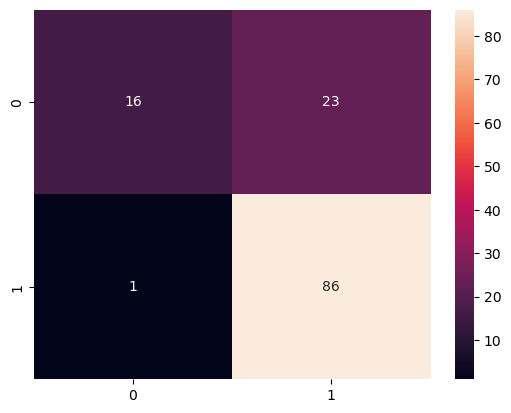

In [43]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.5g')
print(classification_report(y_test,y_pred))

In [44]:
y_prob=rfc.predict_proba(X_test_scaled)

In [45]:
y_prob=y_prob[:,1]

In [46]:
roc_auc_score(y_test,y_prob)

0.7774830533451222

In [47]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob)

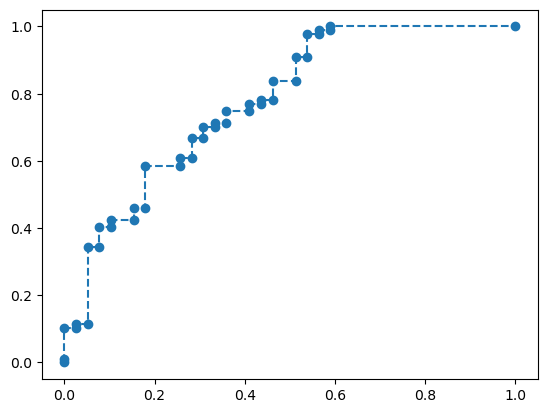

In [48]:
plt.plot(fpr,tpr,marker='o',linestyle='--')

In [49]:
import tensorflow as tf

In [50]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6,activation='relu',input_shape=(X_train_scale.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(X_train_scale,y_train,batch_size=40,epochs=600)

Epoch 1/600


7/7 [==============================] - 1s 3ms/step - loss: 0.9233 - accuracy: 0.4157
Epoch 2/600
7/7 [==============================] - 0s 2ms/step - loss: 0.9236 - accuracy: 0.4353
Epoch 3/600
7/7 [==============================] - 0s 2ms/step - loss: 0.9021 - accuracy: 0.4275
Epoch 4/600
7/7 [==============================] - 0s 2ms/step - loss: 0.8901 - accuracy: 0.4431
Epoch 5/600
7/7 [==============================] - 0s 2ms/step - loss: 0.9090 - accuracy: 0.4784
Epoch 6/600
7/7 [==============================] - 0s 2ms/step - loss: 0.8231 - accuracy: 0.5216
Epoch 7/600
7/7 [==============================] - 0s 2ms/step - loss: 0.7875 - accuracy: 0.5020
Epoch 8/600
7/7 [==============================] - 0s 2ms/step - loss: 0.8318 - accuracy: 0.4902
Epoch 9/600
7/7 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.5098
Epoch 10/600
7/7 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.5412
Epoch 11/600
7/7 [=========

7/7 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7569
Epoch 81/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7608
Epoch 82/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7686
Epoch 83/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7490
Epoch 84/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7647
Epoch 85/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7569
Epoch 86/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7647
Epoch 87/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7647
Epoch 88/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7843
Epoch 89/600
7/7 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7647
Epoch 90/600
7/7 [===============

7/7 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8627
Epoch 164/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8235
Epoch 165/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8157
Epoch 166/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8431
Epoch 167/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8275
Epoch 168/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8510
Epoch 169/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8353
Epoch 170/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8667
Epoch 171/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8353
Epoch 172/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8275
Epoch 173/600
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8431
Epoch 246/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8510
Epoch 247/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8510
Epoch 248/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8471
Epoch 249/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8627
Epoch 250/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8510
Epoch 251/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8431
Epoch 252/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8549
Epoch 253/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8353
Epoch 254/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8549
Epoch 255/600
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8588
Epoch 328/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8549
Epoch 329/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8627
Epoch 330/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8627
Epoch 331/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8510
Epoch 332/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8706
Epoch 333/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8706
Epoch 334/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8588
Epoch 335/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8627
Epoch 336/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8431
Epoch 337/600
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8588
Epoch 410/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8784
Epoch 411/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8706
Epoch 412/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8471
Epoch 413/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8941
Epoch 414/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8706
Epoch 415/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8627
Epoch 416/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8667
Epoch 417/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8745
Epoch 418/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8510
Epoch 419/600
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8706
Epoch 492/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8824
Epoch 493/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8588
Epoch 494/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8706
Epoch 495/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8745
Epoch 496/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8667
Epoch 497/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8588
Epoch 498/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8431
Epoch 499/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8627
Epoch 500/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8549
Epoch 501/600
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8627
Epoch 574/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8706
Epoch 575/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8549
Epoch 576/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8549
Epoch 577/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8863
Epoch 578/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8667
Epoch 579/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8824
Epoch 580/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8549
Epoch 581/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8706
Epoch 582/600
7/7 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8471
Epoch 583/600
7/7 [=====